
## Importing Library Files
#Assigment was fully completed and submitted by Sudheendra Rao K

In [435]:
#NumPy, Pandas Files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import sklearn files 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

#metrices
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

#warnings 
import warnings 
warnings.filterwarnings('ignore')


In [436]:
#Import the data
tel_data= pd.read_csv(r"C:\Users\sudhe\Downloads\telecom_churn_data.csv")
tel_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,...,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,...,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,...,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,44,23,30,0,NaN,7/25/2014,8/10/2014,NaN,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365

In [437]:
tel_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,...,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,...,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.00000

In [438]:
tel_data.shape

(99999, 226)

### Good Phase-First two months

In [439]:
#It's given that the high value customers are ones who have recharged above amount X, where X is 70th percentile of average recharge of first two months.
#Using this data we can find out high value customers

# We need to extract list of columns containing recharge amount
amt_recharge_column = tel_data.columns[tel_data.columns.str.contains('rech')]
amt_recharge_column

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [440]:
#Let's filter Recharge amount and recharge data from the columns above
amt_recharge_column = tel_data.columns[tel_data.columns.str.contains('rech_amt|rech_data')]
amt_recharge_column

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

In [441]:
#Understanding the data

tel_data.loc[:,amt_recharge_column].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [442]:
#We can see Zero's are there as min values. So there are null values in the data
#Let's do null check

tel_data_nullcheck = tel_data.loc[:,amt_recharge_column].isnull().sum()/len(tel_data)
tel_data_nullcheck

total_rech_amt_6            0.000000
total_rech_amt_7            0.000000
total_rech_amt_8            0.000000
total_rech_amt_9            0.000000
max_rech_amt_6              0.000000
max_rech_amt_7              0.000000
max_rech_amt_8              0.000000
max_rech_amt_9              0.000000
date_of_last_rech_data_6    0.748467
date_of_last_rech_data_7    0.744287
date_of_last_rech_data_8    0.736607
date_of_last_rech_data_9    0.740777
total_rech_data_6           0.748467
total_rech_data_7           0.744287
total_rech_data_8           0.736607
total_rech_data_9           0.740777
max_rech_data_6             0.748467
max_rech_data_7             0.744287
max_rech_data_8             0.736607
max_rech_data_9             0.740777
av_rech_amt_data_6          0.748467
av_rech_amt_data_7          0.744287
av_rech_amt_data_8          0.736607
av_rech_amt_data_9          0.740777
dtype: float64

In [443]:
#Replace NA values of Total Recharge by 0
tel_data['total_rech_data_6'] = tel_data['total_rech_data_6'].replace(np.NaN,0.0)
tel_data['total_rech_data_7'] = tel_data['total_rech_data_7'].replace(np.NaN,0.0)
tel_data['total_rech_data_8'] = tel_data['total_rech_data_8'].replace(np.NaN,0.0)

In [444]:
#Replace NA values of Average recharge by 0
tel_data['av_rech_amt_data_6'] = tel_data['av_rech_amt_data_6'].replace(np.NaN,0.0)
tel_data['av_rech_amt_data_7'] = tel_data['av_rech_amt_data_7'].replace(np.NaN,0.0)
tel_data['av_rech_amt_data_8'] = tel_data['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [445]:
#To caluculate high value customers we need to add the new column called total rech amount data
tel_data['total_rech_amt_data_6'] = tel_data.av_rech_amt_data_6*tel_data.total_rech_data_6
tel_data['total_rech_amt_data_7'] = tel_data.av_rech_amt_data_7*tel_data.total_rech_data_7
tel_data['total_rech_amt_data_8'] = tel_data.av_rech_amt_data_8*tel_data.total_rech_data_8

In [446]:
#Finding out Average recharge done for first two months (June and July)
tel_data_temp=(tel_data['total_rech_amt_6']+tel_data['total_rech_amt_7']+tel_data['total_rech_amt_data_6']+tel_data['total_rech_amt_data_7'])/2
tel_data_temp

0         559.0
1         306.0
2         241.5
3         270.0
4         301.0
          ...  
99994      85.0
99995     110.0
99996      98.5
99997    1602.0
99998     432.0
Length: 99999, dtype: float64

In [447]:
#Take 70th percentile of the average amount calculated
tel_data70=np.percentile(tel_data_temp,70.0)
print('70th Percentile is:',tel_data70)

70th Percentile is: 478.0


In [448]:
#Filter high value customers based on 70th percentile
tel_datahv=tel_data[tel_data_temp>= tel_data70]
tel_datahv

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,...,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,...,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.00,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,...,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.

In [449]:
tel_datahv.shape

(30001, 229)

In [450]:
#New column "Churn" is introduced, 1- Churn, 0- Non_churn
tel_datahv['churn'] = np.where(tel_datahv[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1)==0, 1,0)
tel_datahv.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,...,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,...,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.5,0.0,6.50,NaN,0.0,0.0,0.0,NaN,487.53,609.24,350.16,0.00,...,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.00,0.00,0.00,0.00,

In [451]:
#Ratio of churned customers
tel_datahv['churn'].value_counts()/len(tel_datahv)

#Convert columns to appropriate formats,haddle mssing values, etc.



0    0.918636
1    0.081364
Name: churn, dtype: float64

In [452]:
#Remove attributes of the column corresponding to '_9'
churn_month_columns = tel_datahv.columns[tel_datahv.columns.str.contains('_9')]
churn_month_columns

tel_datahv.drop(churn_month_columns,axis=1, inplace=True)

In [453]:
tel_datahv.head()
tel_datahv.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
count,3.000100e+04,30001.0,29777.0,29777.0,29777.0,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.0,29464.0,28827.0,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.0,29464.0,28827.0,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.00000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15

In [454]:
tel_datahv.shape

(30001, 176)

## EDA


In [455]:
# lets check the unique value columns and drop one with only one unique value them, as they are give us no additional info or insight into the data
for i in tel_datahv.columns:
    if tel_datahv[i].nunique() == 1:
        
        tel_datahv.drop(i,axis=1,inplace = True)

print("\nDimension of the tel_datahv dataframe:",tel_datahv.shape)


Dimension of the tel_datahv dataframe: (30001, 163)


In [456]:
tel_datahv.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8', 'churn'],
      dtype='object', length=163)

In [457]:
# lets check for columns that can be changed to integers, floats to date types
cols_types = tel_datahv.select_dtypes(include=['object'])
print(cols_types.iloc[0])

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
Name: 0, dtype: object


In [458]:
#Convert to datetime

for col in cols_types.columns:
    tel_datahv[col] = pd.to_datetime(tel_datahv[col])
    

In [459]:
tel_datahv.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,NaT,NaT,NaT,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,5

In [460]:
#Let's check for Null values

(tel_datahv.isnull().sum() * 100 / len(tel_datahv)).sort_values(ascending = False)

count_rech_3g_8             46.825106
arpu_3g_8                   46.825106
date_of_last_rech_data_8    46.825106
count_rech_2g_8             46.825106
night_pck_user_8            46.825106
max_rech_data_8             46.825106
arpu_2g_8                   46.825106
fb_user_8                   46.825106
night_pck_user_6            44.148528
arpu_2g_6                   44.148528
date_of_last_rech_data_6    44.148528
arpu_3g_6                   44.148528
max_rech_data_6             44.148528
count_rech_2g_6             44.148528
count_rech_3g_6             44.148528
fb_user_6                   44.148528
date_of_last_rech_data_7    43.145228
arpu_3g_7                   43.145228
arpu_2g_7                   43.145228
max_rech_data_7             43.145228
night_pck_user_7            43.145228
count_rech_2g_7             43.145228
count_rech_3g_7             43.145228
fb_user_7                   43.145228
loc_og_mou_8                 3.913203
spl_og_mou_8                 3.913203
loc_ic_t2t_m

In [461]:
pd.set_option('display.max_rows',170)
tel_datahv.dtypes

mobile_number                        int64
arpu_6                             float64
arpu_7                             float64
arpu_8                             float64
onnet_mou_6                        float64
onnet_mou_7                        float64
onnet_mou_8                        float64
offnet_mou_6                       float64
offnet_mou_7                       float64
offnet_mou_8                       float64
roam_ic_mou_6                      float64
roam_ic_mou_7                      float64
roam_ic_mou_8                      float64
roam_og_mou_6                      float64
roam_og_mou_7                      float64
roam_og_mou_8                      float64
loc_og_t2t_mou_6                   float64
loc_og_t2t_mou_7                   float64
loc_og_t2t_mou_8                   float64
loc_og_t2m_mou_6                   float64
loc_og_t2m_mou_7                   float64
loc_og_t2m_mou_8                   float64
loc_og_t2f_mou_6                   float64
loc_og_t2f_

### Plotting graphs for different attributes

In [462]:
rech_amt_columns = tel_datahv.columns[tel_datahv.columns.str.contains('rech_amt')]
rech_amt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8']

In [463]:
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = tel_datahv
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

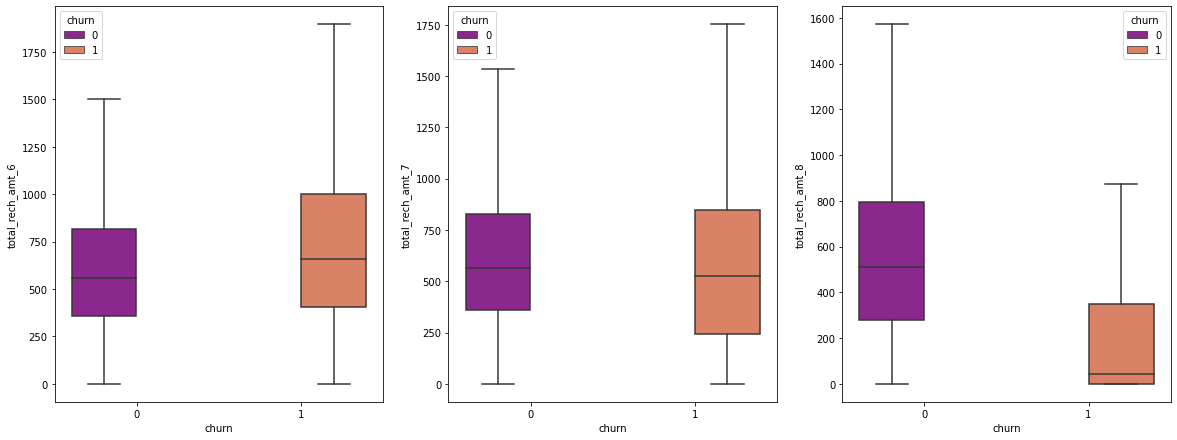

In [464]:
plot_box_chart('total_rech_amt')
#We can drop of total recharge amount for the churned customers

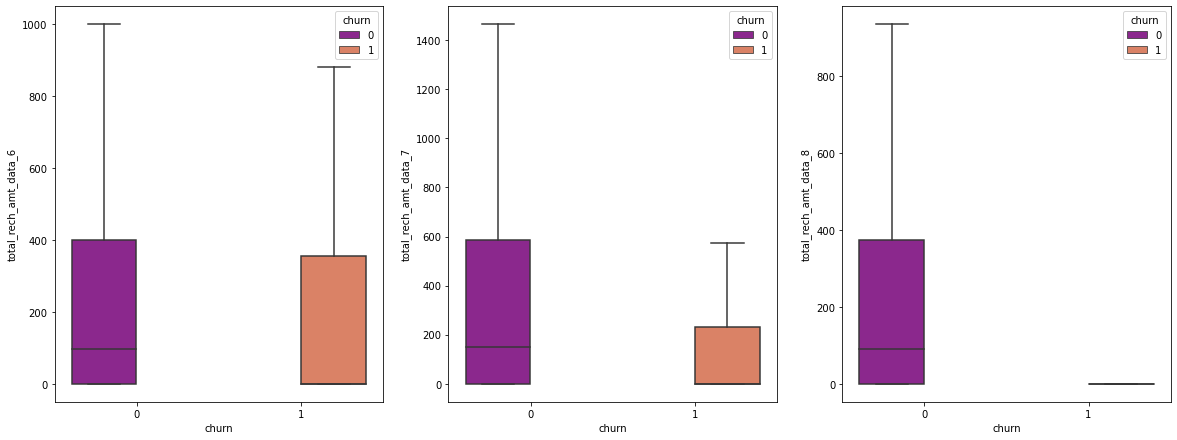

In [465]:
plot_box_chart('total_rech_amt_data')
#8th month we can see total rechage amount for data has dropped significantly

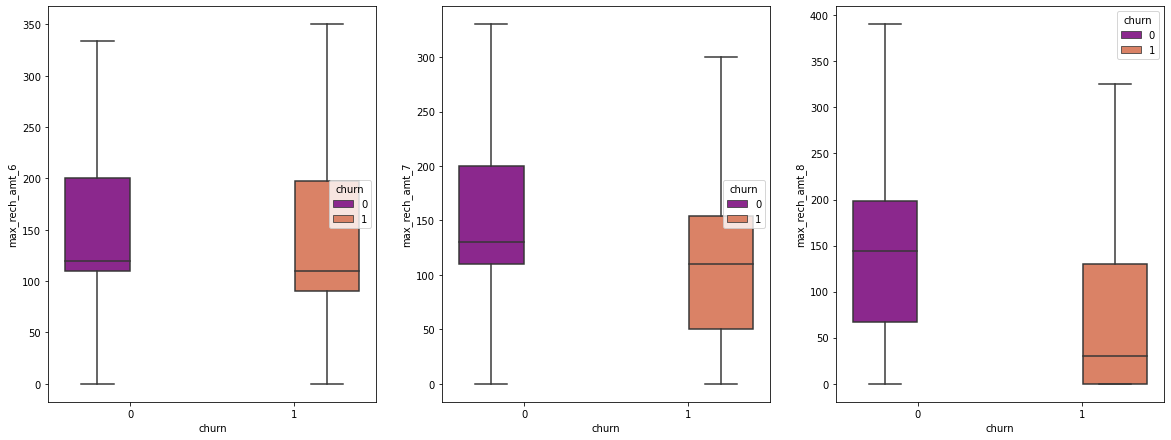

In [466]:
plot_box_chart('max_rech_amt')
#Even amx recharge amount has dropped significantly

In [467]:
# Let's check other recharge related variables:
other_recharge = tel_datahv.columns[tel_datahv.columns.str.contains('rech_num|max_rech_data',regex=True)]

In [468]:
#the % of NA values for other recharge related variables
100*tel_datahv.loc[:,other_recharge].isnull().sum()/len(tel_datahv)

total_rech_num_6     0.000000
total_rech_num_7     0.000000
total_rech_num_8     0.000000
max_rech_data_6     44.148528
max_rech_data_7     43.145228
max_rech_data_8     46.825106
dtype: float64

In [469]:
tel_datahv.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16756.000000,17057.000000,15953.000000
mean,139.798580,140.431143,136.329217
std,118.851784,120.247247,119.531924
min,1.000000,1.000000,1.000000
25%,25.000000,25.000000,25.000000
50%,152.000000,152.000000,152.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000


In [470]:
#Min vaslue is One but there are NaN values
#So fill NaN with Zero
tel_datahv.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= tel_datahv.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)


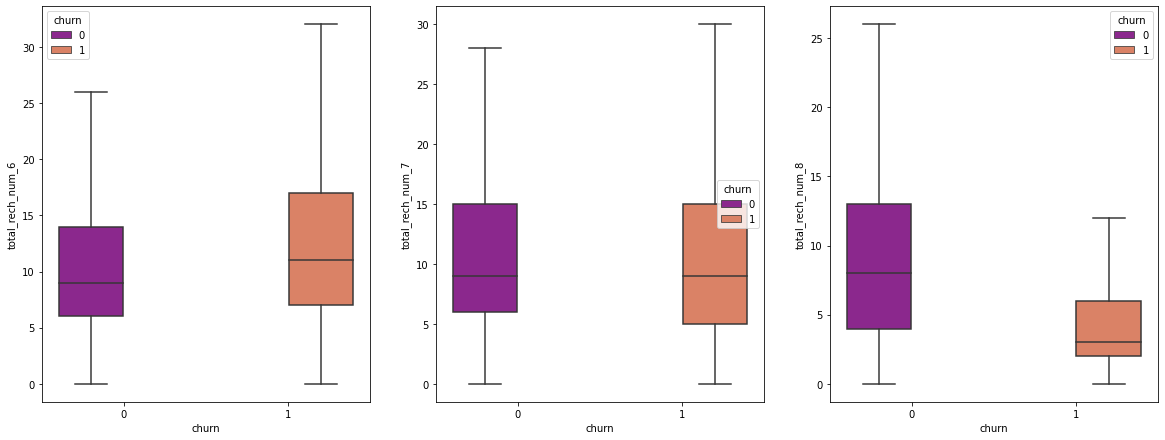

In [471]:
plot_box_chart('total_rech_num')
#Total recharge no. has also dropped significataly in month 8

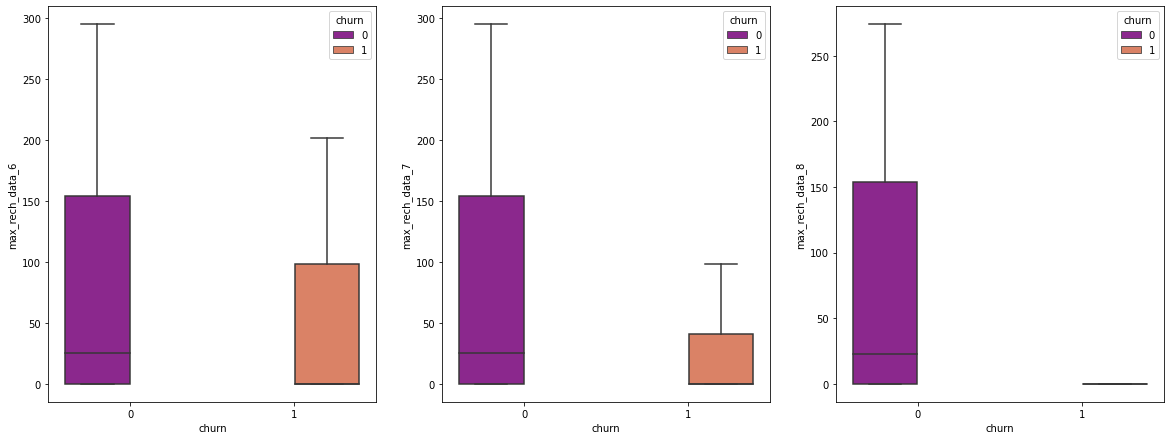

In [472]:
# Ploting for maximum recharge for data:
plot_box_chart('max_rech_data')
#Again 8th month has huge drop for churned

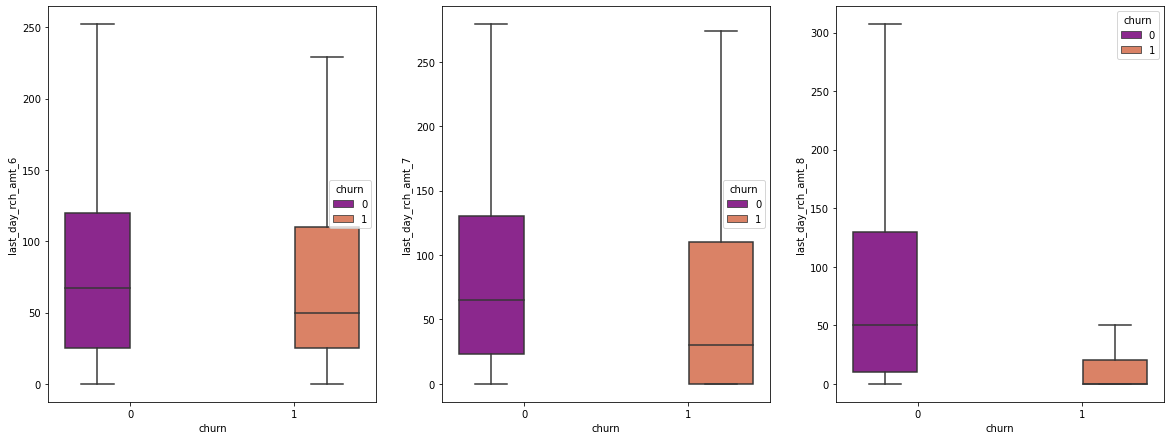

In [473]:
# Plotting for last day recharge amount:
plot_box_chart('last_day_rch_amt')
#8th montth recharge has huge drop

In [474]:
_2g_and_3g_usage = tel_datahv.columns[tel_datahv.columns.str.contains('2g|3g',regex=True)]

In [475]:
#Percentage null
100*tel_datahv.loc[:,_2g_and_3g_usage].isnull().sum()/len(tel_datahv.loc[:,_2g_and_3g_usage])

count_rech_2g_6    44.148528
count_rech_2g_7    43.145228
count_rech_2g_8    46.825106
count_rech_3g_6    44.148528
count_rech_3g_7    43.145228
count_rech_3g_8    46.825106
vol_2g_mb_6         0.000000
vol_2g_mb_7         0.000000
vol_2g_mb_8         0.000000
vol_3g_mb_6         0.000000
vol_3g_mb_7         0.000000
vol_3g_mb_8         0.000000
arpu_3g_6          44.148528
arpu_3g_7          43.145228
arpu_3g_8          46.825106
arpu_2g_6          44.148528
arpu_2g_7          43.145228
arpu_2g_8          46.825106
monthly_2g_6        0.000000
monthly_2g_7        0.000000
monthly_2g_8        0.000000
sachet_2g_6         0.000000
sachet_2g_7         0.000000
sachet_2g_8         0.000000
monthly_3g_6        0.000000
monthly_3g_7        0.000000
monthly_3g_8        0.000000
sachet_3g_6         0.000000
sachet_3g_7         0.000000
sachet_3g_8         0.000000
aug_vbc_3g          0.000000
jul_vbc_3g          0.000000
jun_vbc_3g          0.000000
sep_vbc_3g          0.000000
dtype: float64

In [476]:
#We are getting roughly  more 45% values are not available for count of recharge and average revenue for 2G/3G per user.We can drop these columns.
tel_datahv.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

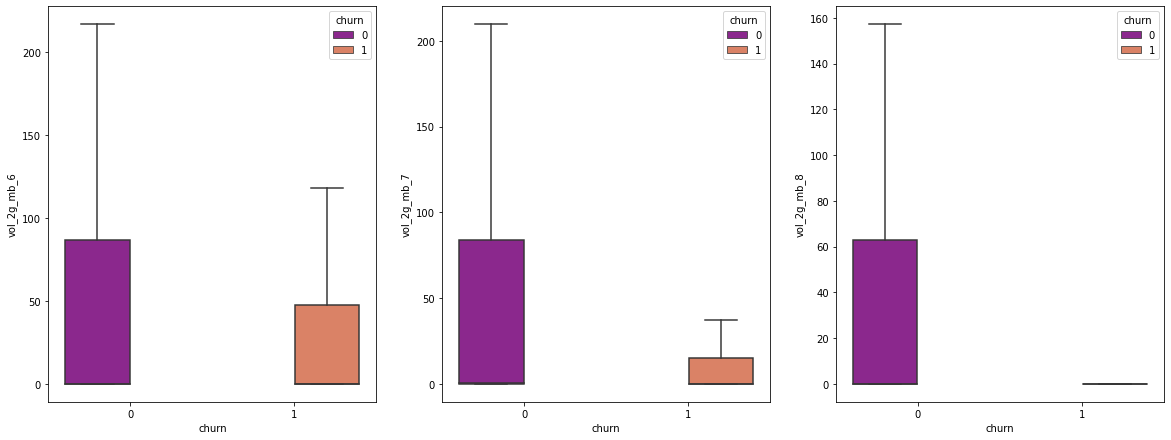

In [477]:
#volume of 2G and 3G Usage
plot_box_chart('vol_2g_mb')

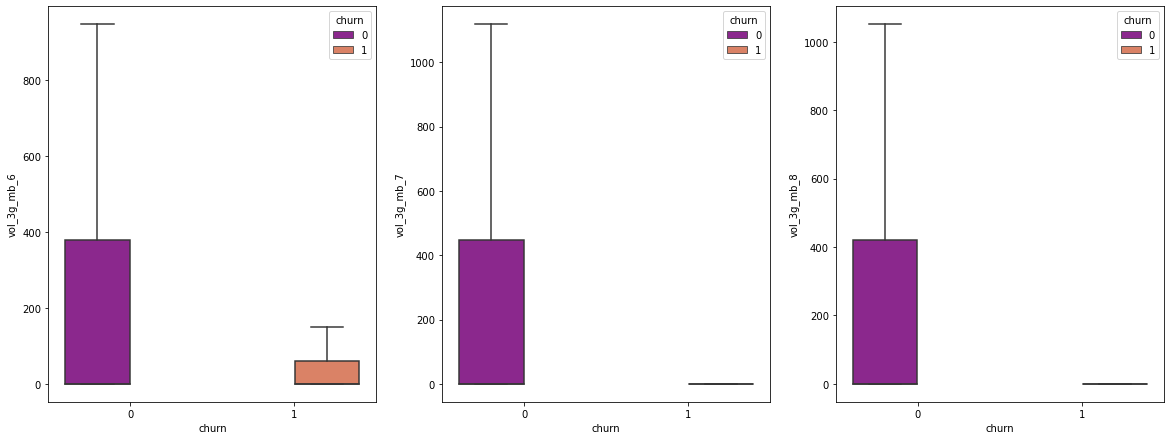

In [478]:
plot_box_chart('vol_3g_mb')

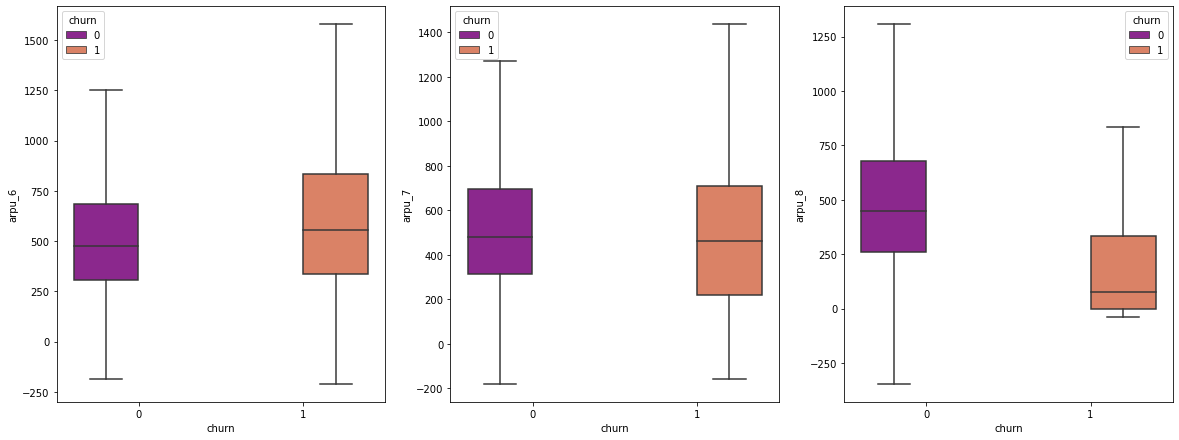

In [479]:
# Above plot we can there is drop in 2G and 3G volume by the churned customers in 8th month
# Now checking average revenue per user

arpu_colus = tel_datahv.columns[tel_datahv.columns.str.contains('arpu_')]

plot_box_chart('arpu')

In [480]:
#replace minutes of usage varible with zero
mou_col = tel_datahv.columns[tel_datahv.columns.str.contains('mou')]
tel_datahv.loc[:, mou_col] = tel_datahv.loc[:, mou_col].replace(np.nan,0)

In [481]:
import numpy as np

# Create correlation matrix
corr_matrix = tel_datahv.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any((upper[column] > 0.85) | (upper[column] < -0.85))]
to_drop

# Drop features 
#df.drop(to_drop, axis=1, inplace=True)

['std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8']

In [482]:
#Find more than 30% NaN values columns 

percent_missing = tel_datahv.isnull().sum() * 100 / len(tel_datahv)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df = missing_value_df[missing_value_df['percent_missing']>30]
missing_value_df

,percent_missing
date_of_last_rech_data_8,46.825106
fb_user_8,46.825106
night_pck_user_8,46.825106
date_of_last_rech_data_6,44.148528
night_pck_user_6,44.148528
fb_user_6,44.148528
date_of_last_rech_data_7,43.145228
night_pck_user_7,43.145228
fb_user_7,43.145228


In [483]:
is_more_30=missing_value_df.index
tel_datahv.drop(tel_datahv[is_more_30], axis=1,inplace =True)

In [484]:
y=["date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8"]
tel_datahv.drop(tel_datahv[y], axis=1,inplace = True)
tel_datahv.shape

(30001, 139)

In [485]:
#dropping more than 85% correlated variables

import numpy as np

# Create correlation matrix
corr_matrix = tel_datahv.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any((upper[column] > 0.85) | (upper[column] < -0.85))]
to_drop

# Drop features 
tel_datahv.drop(to_drop, axis=1, inplace=True)
tel_datahv.shape

(30001, 122)

In [486]:
percent_missing = tel_datahv.isnull().sum() * 100 / len(tel_datahv)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,percent_missing
ic_others_8,3.913203
og_others_8,3.913203
og_others_6,1.816606
ic_others_6,1.816606
ic_others_7,1.789940
og_others_7,1.789940
total_rech_data_6,0.000000
last_day_rch_amt_8,0.000000
last_day_rch_amt_7,0.000000
last_day_rch_amt_6,0.000000


In [488]:
#These columns' NaN will be replaced by Zero
num_col = ['og_others_8', 'ic_others_8', 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7']
for i in num_col:
    tel_datahv.loc[tel_datahv[i].isnull(),i]=0

In [489]:
#There are no missing values anymore here
tel_datahv.isnull().sum() * 100 / len(tel_datahv)

mobile_number            0.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2c_mou_6         0.0
loc_og_t2c_mou_7         0.0
loc_og_t2c_mou_8         0.0
loc_og_mou_6             0.0
loc_og_mou_7             0.0
loc_og_mou_8             0.0
std_og_t2m_mou_6         0.0
std_og_t2f_mou_6         0.0
std_og_t2f_mou_7         0.0
std_og_t2f_mou

### Deriving New Features

In [490]:
tel_data_final = tel_datahv.copy()
tel_data_final.shape

(30001, 122)

In [491]:
tel_data_final.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.0,0.00,422.16,533.91,255.79,49.89,6.66,20.08,16.68,60.86,75.14,77.84,0.00,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,13.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.0,0.00,97.04,94.09,129.74,665.36,0.00,0.00,0.00,763.29,934.69,938.79,0.00,0.00,0.00,0.00,0.00,0.0,0.0,860.34,1028.79,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.1

In [492]:
#Create a column which is average of 6th and 7th month
#To do this first create list of columns belonging to 6th and 7th months

col_list = tel_data_final.filter(regex='_6|_7').columns.str[:-2]
print(col_list.unique())


Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou',
       'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou',
       'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou',
       'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num',
       'max_rech_amt', 'last_day_rch_amt', 'total_rech_data', 'max_rech_data',
       'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'monthly_2g',
       'monthly_3g', 'sachet_3g', 'total_rech_amt_data'],
      dtype='object')


In [ ]:
print (tel_data_final.shape)
# lets take the average now
#for idx,col in enumerate(col_list.unique()):
#print(col)
          
    #avg_col_name = "avg_"+col+"_av67" # Creating column name dynamically
    #col_6 = col+"_6"
    #col_7 = col+"_7"
    #tel_data_final[avg_col_name] = (tel_data_final[col_6]  + tel_data_final[col_7])/ 2


# PCA: Principal Component 

In [493]:
# We can use PCA to reduce the dimensionality of the data
tele_pca_df = tel_data_final.copy()


In [494]:
tele_pca_df.shape

(30001, 122)

In [495]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

def split_data(df):
    Y = df["churn"]
    X = df.drop(['churn','mobile_number'],axis=1)
    return X,Y


def scale_data(X):
    scaler =StandardScaler()
    X_col = X.columns
    X_scaled = scaler.fit_transform(X)
    X_scale_final = pd.DataFrame(X_scaled, columns=X_col)
    return X_scale_final
    

In [496]:
X,Y=split_data(tele_pca_df)

In [497]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,49.89,6.66,20.08,16.68,60.86,75.14,77.84,0.0,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,13.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,665.36,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,0.00,0.0,0.0,0.00,0

In [498]:
Y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [499]:
print("Percentage of Churned Customers", 100*Y.sum()/len(Y))


Percentage of Churned Customers 8.136395453484884


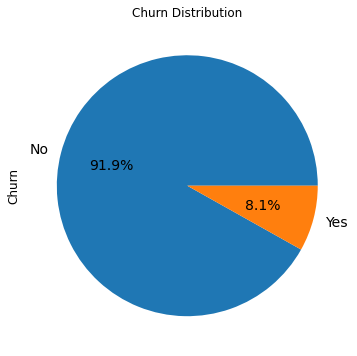

In [500]:
pie_chart = tele_pca_df['churn'].value_counts()*100.0 /len(tele_pca_df)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

In [501]:
X

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,49.89,6.66,20.08,16.68,60.86,75.14,77.84,0.0,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,13.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.00,0.00,97.04,94.09,129.74,665.36,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.00,0.00,0.0,0.0,860.34,1028.79,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93

In [502]:
X_scaled = scale_data(X)
print(X_scaled.shape)
X_scaled.head(5)


(30001, 120)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
0,-0.783934,-0.721110,-0.587295,-0.567389,-0.557973,-0.510671,-0.774470,-0.757851,-0.695102,-0.211142,-0.166821,-0.168644,-0.228664,-0.209702,-0.189707,-0.369267,-0.356201,-0.343393,-0.652679,-0.674786,-0.649485,-0.286763,-0.292733,-0.301836,-0.249886,-0.206345,-0.236923,-0.671579,-0.679562,-0.648738,-0.438692,-0.150556,-0.140681,-0.144968,-0.570350,-0.568914,-0.504756,-0.04736,-0.331206,-0.326265,-0.322832,-0.160932,-0.016029,-0.017377,-0.882761,-0.876129,-0.399749,-0.398068,-0.393050,-0.686203,-0.694765,-0.661315,-0.333947,-0.326157,-0.306046,-0.734251,-0.741503,-0.706512,-0.191710,-0.185709,-0.195041,-0.297277,-0.291707,-0.270201,-0.141147,-0.143406,-0.128764,-0.340289,-0.331038,-0.319871,-0.324561,-0.108683,-0.240002,-0.140557,-0.148118,-0.155784,-0.082473,-0.093788,-0.095788,-0.832647,-0.924364,-0.859681,0.471814,0.439932,0.530329,1.051283,1.076074,1.099369,-0.235841,-0.276152,-0.207584,1.542811,1.506574,1.623534,0.605745,0.542627,0.664001,-0.291633,-0.373338,-0.319622,-0.285301,-0.239688,-0.263202,-0.401186,-0.406870,-0.377948,1.275694,1.169713,1.277611,-0.21244,-0.208726,-0.183979,-0.252040,-0.329572,-0.403287,-0.137557,-0.084956,-0.143642,-0.187149,-0.130183
1,1.108669,1.644683,5.305036,-0.441551,-0.444053,-0.396611,0.165251,0.378936,-0.019017,0.001568,0.275089,0.258208,-0.024367,-0.078691,0.173748,-0.144651,-0.225735,-0.166236,0.581285,1.177161,0.045037,2.521602,2.220048,2.427634,-0.249886,-0.206345,-0.236923,0.444264,0.742633,0.055211,-0.316717,0.405406,1.406308,1.380881,-0.470353,-0.451469,-0.376933,-0.04736,-0.075043,-0.326265,-0.002816,-0.160932,-0.016029,-0.017377,-0.177078,-0.026667,-0.044665,-0.205357,-0.222198,0.306337,0.320129,-0.116543,2.991869,1.737500,0.580236,0.624893,0.382679,-0.114251,0.283099,-0.043250,0.230963,0.633800,0.910136,1.097419,2.591370,1.611216,0.987507,0.972737,0.837169,1.077280,0.792135,-0.108683,-0.240002,-0.113709,0.033104,0.291670,1.042962,0.855762,1.088596,-0.726591,-0.712326,-0.320552,8.046836,3.405954,8.197548,-0.701941,-0.712132,4.729348,-0.589050,-0.599589,-0.541366,-0.692627,-0.698704,-0.655655,-0.652213,-0.675910,-0.624450,-0.382791,-0.377319,-0.337971,-0.376761,-0.404361,-0.382472,-0.401186,-0.406870,-0.377948,-0.355126,-0.347475,-0.341722,-0.21244,-0.20

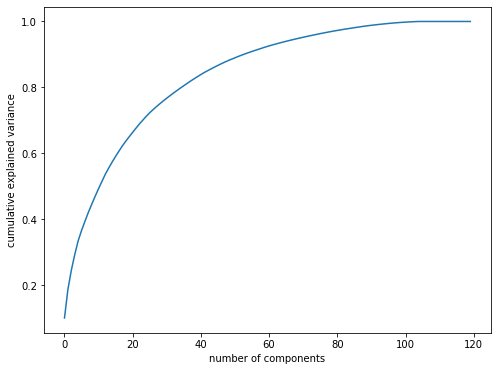

,PC1,PC2,PC3,Feature
0,-0.104344,0.116476,0.154141,arpu_6
1,-0.103885,0.124285,0.177088,arpu_7
2,-0.091485,0.137557,0.161587,arpu_8
3,-0.133501,-0.007762,0.118485,onnet_mou_6
4,-0.139309,-0.005472,0.135800,onnet_mou_7
5,-0.129679,0.008838,0.130377,onnet_mou_8
6,-0.167353,0.043708,0.119999,offnet_mou_6
7,-0.169148,0.044404,0.136654,offnet_mou_7
8,-0.151246,0.061272,0.122297,offnet_mou_8
9,-0.016128,0.008477,0.044855,roam_ic_mou_6


In [504]:
def get_scree_plot(X):
    pca = PCA(svd_solver='randomized', random_state=101)
    pca.fit(X)
    fig = plt.figure(figsize = (8,6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    return pca

pca = get_scree_plot(X_scaled) # scree plot

col = list(X_scaled.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

In [508]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=5)*100)

array([ 10.05 ,  18.701,  24.488,  29.237,  33.417,  36.582,  39.378,
        42.09 ,  44.568,  46.989,  49.296,  51.53 ,  53.712,  55.591,
        57.402,  59.087,  60.709,  62.287,  63.714,  65.059,  66.377,
        67.672,  68.945,  70.098,  71.245,  72.312,  73.276,  74.195,
        75.068,  75.926,  76.741,  77.537,  78.31 ,  79.06 ,  79.804,
        80.525,  81.233,  81.935,  82.608,  83.257,  83.901,  84.522,
        85.077,  85.624,  86.155,  86.676,  87.187,  87.666,  88.126,
        88.56 ,  88.987,  89.405,  89.8  ,  90.182,  90.56 ,  90.911,
        91.257,  91.599,  91.938,  92.275,  92.592,  92.887,  93.173,
        93.449,  93.722,  93.985,  94.241,  94.494,  94.738,  94.976,
        95.207,  95.436,  95.66 ,  95.882,  96.1  ,  96.313,  96.515,
        96.715,  96.907,  97.098,  97.279,  97.456,  97.624,  97.787,
        97.949,  98.109,  98.267,  98.423,  98.575,  98.714,  98.84 ,
        98.961,  99.077,  99.187,  99.291,  99.393,  99.486,  99.575,
        99.658,  99.

In [514]:
# We can see that 80 componets could expalin roughly 95% variance of the data
#Time to resample data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y, train_size=0.7, test_size=0.3, random_state=1)
x_train.shape
x_test.shape

(9001, 120)

In [517]:
pca = IncrementalPCA(n_components=80)    
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

x_train_pca.shape

(21000, 80)

In [519]:
x_test_pca.shape

(9001, 80)

# Logisitic Regression

In [521]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_pca = LogisticRegression()
model = lr_pca.fit(x_train_pca,y_train)

y_pred = lr_pca.predict(x_test_pca)

# convert prediction array into a dataframe
y_pred_df = pd.DataFrame(y_pred)


In [522]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

[[8171  101]
 [ 541  188]]
Accuracy of the logistic regression model with PCA:  0.928674591712032


# Decision Tree

In [539]:
# lets create a decision tree now
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, train_size=0.7, random_state=1)
x_test.shape

(9001, 120)

In [573]:
#lasso regression usage for feature selection

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(x_train, y_train)
svc_model = SelectFromModel(svc, prefit=True)
x_lasso = svc_model.transform(x_train)
position = svc_model.get_support(indices=True)

print(x_lasso.shape)

# feature vector for decision tree
lasso_features = list(x_train.columns[position])
print("Lasso Features: ", lasso_features)
print("Positions",position)

(21000, 22)
Lasso Features:  ['arpu_6', 'arpu_8', 'offnet_mou_8', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_8', 'loc_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8', 'monthly_2g_7', 'monthly_2g_8', 'aon']
Positions [  0   2   8  10  11  13  14  20  29  34  36  57  72  79  81  84  87  90
  93 104 105 112]


In [554]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# lets create a decision tree with the default hyper parameters except max depth to make the tree readable
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(x_lasso, y_train)

DecisionTreeClassifier(max_depth=5)

In [571]:
# lets see the classification reort of the model built
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model predictions
x_test = pd.DataFrame(data=x_test).iloc[:,position]
y_pred1 = dt1.predict(x_test)

# classification report
print("accuracy of decison tree without hyper parameter tuning",accuracy_score(y_test, y_pred1))

IndexError: positional indexers are out-of-bounds

## Let's fine tune hyper parameters

In [574]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
                               
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(x_lasso, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [575]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024005,0.000895,0.001200,3.990437e-04,1,{'max_depth': 1},0.935714,0.926905,0.925238,0.927857,0.935476,0.930238,0.004454,10,0.928869,0.931071,0.931488,0.930833,0.928929,0.930238,0.001114
1,0.042409,0.000491,0.001001,1.256174e-06,2,{'max_depth': 2},0.944762,0.941190,0.942143,0.942381,0.945714,0.943238,0.001708,2,0.942857,0.943750,0.943512,0.943452,0.942619,0.943238,0.000427
2,0.060213,0.000401,0.000600,4.898627e-04,3,{'max_depth': 3},0.944524,0.941190,0.942143,0.942381,0.945714,0.943190,0.001667,3,0.942976,0.943750,0.943512,0.943452,0.942619,0.943262,0.000408
3,0.077215,0.001719,0.000801,4.002573e-04,4,{'max_depth': 4},0.945476,0.941905,0.942381,0.942619,0.946667,0.943810,0.001899,1,0.944405,0.944881,0.944226,0.945060,0.944048,0.944524,0.000386
4,0.096418,0.002418,0.001000,5.917394e-07,5,{'max_depth': 5},0.942857,0.940714,0.935476,0.942619,0.941905,0.940714,0.002723,5,0.945238,0.945595,0.945238,0.946012,0.945357,0.945488,0.000293


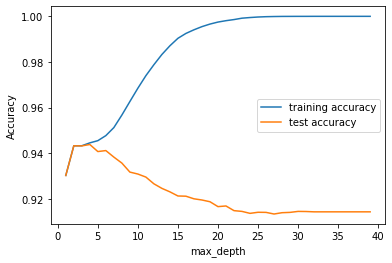

In [577]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [578]:
# lets find optimal value of minimum sample leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(x_lasso, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [579]:
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.250079,0.016955,0.001001,8.341244e-07,5,{'min_samples_leaf': 5},0.928810,0.925952,0.929524,0.927619,0.925238,0.927429,0.001632,10,0.967917,0.967976,0.968333,0.968393,0.968036,0.968131,0.000194
1,0.213648,0.015027,0.001202,3.993139e-04,25,{'min_samples_leaf': 25},0.945952,0.940000,0.934286,0.937143,0.937619,0.939000,0.003922,9,0.948274,0.949583,0.950298,0.950833,0.950952,0.949988,0.000984
2,0.179241,0.008878,0.001005,3.831350e-06,45,{'min_samples_leaf': 45},0.945476,0.940714,0.935238,0.942381,0.939762,0.940714,0.003357,5,0.946250,0.946429,0.946250,0.946310,0.946905,0.946429,0.000247
3,0.169053,0.003578,0.001201,4.002063e-04,65,{'min_samples_leaf': 65},0.944286,0.941667,0.941905,0.939762,0.945000,0.942524,0.001896,1,0.944881,0.945119,0.945298,0.945417,0.945714,0.945286,0.000280
4,0.167652,0.005582,0.000800,4.000904e-04,85,{'min_samples_leaf': 85},0.943095,0.938095,0.936905,0.938810,0.944048,0.940190,0.002843,8,0.944643,0.944167,0.944345,0.945476,0.945536,0.944833,0.000570


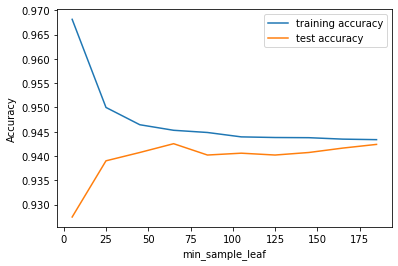

In [580]:
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [581]:
# min_sample_leaf =25 seems to be the optimal one

# lets fine tune min sample split now
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(x_lasso, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [582]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.280943,0.018078,0.001203,0.000399,5,{'min_samples_split': 5},0.914048,0.915952,0.916667,0.910476,0.918810,0.915190,0.002807,10,0.991131,0.991131,0.990893,0.990833,0.990952,0.990988,0.000123
1,0.281883,0.016019,0.001402,0.000499,25,{'min_samples_split': 25},0.926190,0.927381,0.925238,0.926667,0.930238,0.927143,0.001697,9,0.963036,0.966310,0.967440,0.965357,0.967321,0.965893,0.001616
2,0.279061,0.014269,0.001405,0.000491,45,{'min_samples_split': 45},0.934286,0.928571,0.927857,0.933571,0.932857,0.931429,0.002673,8,0.955952,0.960000,0.958393,0.957560,0.960357,0.958452,0.001617
3,0.277864,0.014135,0.001000,0.000005,65,{'min_samples_split': 65},0.935714,0.932381,0.930952,0.936905,0.935476,0.934286,0.002239,7,0.953393,0.956607,0.956190,0.953512,0.955833,0.955107,0.001374
4,0.274707,0.011298,0.001196,0.000402,85,{'min_samples_split': 85},0.937381,0.936190,0.930952,0.938333,0.935714,0.935714,0.002551,6,0.951131,0.953750,0.953333,0.952083,0.952500,0.952560,0.000926


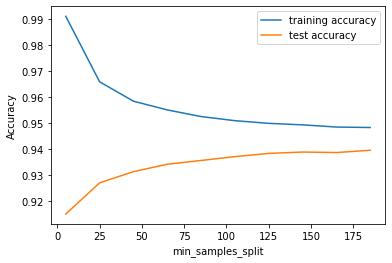

In [583]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [584]:
#min_samples_leaf=75 seems optimal


In [585]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_lasso, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   16.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 175, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [586]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

Best Accuracy 0.9419047619047619


In [587]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=25,
                       min_samples_split=50)


In [589]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(x_lasso, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=25, min_samples_split=50,
                       random_state=100)

In [590]:
# accuracy score
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(x_test,y_test))

Accuracy Score for Decision Tree Final Model : 0.9410065548272414


# Random Forest 

In [591]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(x_lasso, y_train)

# Make predictions
prediction_test = model_rf.predict(x_test)
print ('Random Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Random Forest Accuracy with Default Hyperparameter 0.9402288634596156


In [592]:
print(confusion_matrix(y_test, prediction_test))

[[8123  149]
 [ 389  340]]


In [593]:
#Let's fine tune parameters

In [594]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(x_lasso, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [595]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.709746,0.013138,0.020406,0.000488,2,{'max_depth': 2},0.941429,0.942381,0.939762,0.937381,0.942857,0.940762,0.001994,4,0.941250,0.940238,0.940893,0.940595,0.940655,0.940726,0.000335
1,1.710422,0.040159,0.030408,0.000490,7,{'max_depth': 7},0.944286,0.943571,0.943095,0.944286,0.946190,0.944286,0.001054,2,0.948631,0.947976,0.949702,0.949345,0.948690,0.948869,0.000601
2,2.507962,0.022079,0.048006,0.006041,12,{'max_depth': 12},0.944524,0.944524,0.943095,0.943571,0.945000,0.944143,0.000700,3,0.974762,0.975655,0.975119,0.975774,0.975952,0.975452,0.000443
3,2.852135,0.036855,0.053612,0.000790,17,{'max_depth': 17},0.945238,0.944762,0.942381,0.942619,0.947143,0.944429,0.001766,1,0.994643,0.994405,0.994048,0.994524,0.994226,0.994369,0.000212


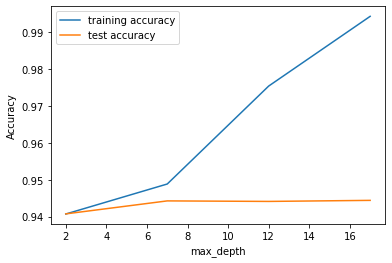

In [596]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [597]:
##Tuning n_estimators
## GridSearchCV to find optimal n_estimators
#from sklearn.model_selection import KFold
## specify number of folds for k-fold CV
n_folds = 5
#
## parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}
#
## instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)
#
#
## fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(x_lasso, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

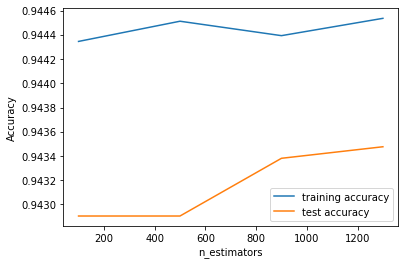

In [598]:
## scores of GridSearch CV
scores = rf.cv_results_
#
## plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [599]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(x_lasso, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(50, 400, 10)},
             return_train_score=True, scoring='accuracy')

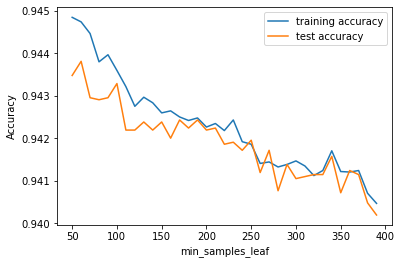

In [600]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [601]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf.fit(x_lasso, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(100, 500, 25)},
             return_train_score=True, scoring='accuracy')

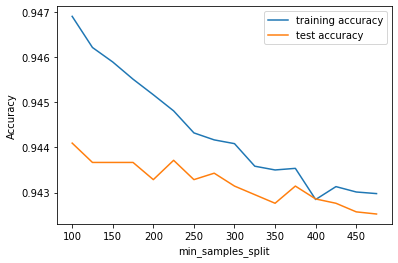

In [603]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [604]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [606]:
grid_search.fit(x_lasso, y_train)
# optimal accuracy score and hyperparameters
print('Accuracy is',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 12.1min finished


Accuracy is 0.9442380952380952 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 700}


In [607]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=101)

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

In [608]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5493
           1       0.72      0.46      0.56       508

    accuracy                           0.94      6001
   macro avg       0.83      0.72      0.76      6001
weighted avg       0.93      0.94      0.93      6001

[[5401   92]
 [ 276  232]]


In [613]:
# Since the Library of XGboost is missing in my system. XGboost isn't done

##### Random Forest produced most accurate model with an accuracy of 94.44%. Decision trees produced second most accurate model with accuracy of 94.1%. Logistic regression model produced 92.4%

<AxesSubplot:>

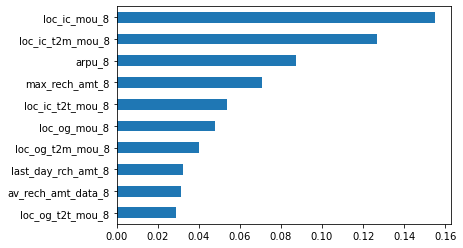

In [617]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X_scaled.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

### Local Incoming for Month 8 (weight around 0.15), Average Revenue Per User for Month 8 (weight of 0.09 ) Max Recharge Amount for Month 8 and Local Outgoing Call for Month 8 ( weight of 0.05

These are Important predictor varibles to predict Churn